## Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Data/Target_Data/Target_combine.csv")

In [3]:
df.head()

,T,TM,Tm,H,VV,V,VM,PM.2.5
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6,219.720833
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6,154.037500
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4,223.208333


In [4]:
df.isnull()

,T,TM,Tm,H,VV,V,VM,PM.2.5
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1100,False,False,False,False,False,False,False,False
1101,False,False,False,False,False,False,False,False
1102,False,False,False,False,False,False,False,False
1103,False,False,False,False,False,False,False,False


In [5]:
df.isna()

,T,TM,Tm,H,VV,V,VM,PM.2.5
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1100,False,False,False,False,False,False,False,False
1101,False,False,False,False,False,False,False,False
1102,False,False,False,False,False,False,False,False
1103,False,False,False,False,False,False,False,False


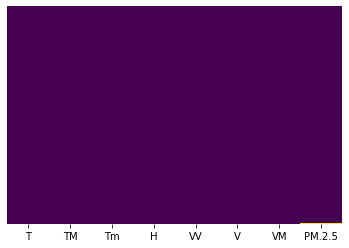

In [6]:
## Check Null values
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df = df.dropna()

In [8]:
df.isna()

,T,TM,Tm,H,VV,V,VM,PM.2.5
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1099,False,False,False,False,False,False,False,False
1100,False,False,False,False,False,False,False,False
1101,False,False,False,False,False,False,False,False
1102,False,False,False,False,False,False,False,False


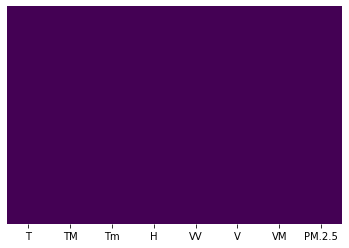

In [9]:
## Check Null values after removing nan values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
X = df.iloc[:,:-1]  # independent features
y = df.iloc[:,-1]   # dependent features

In [11]:
X.head()

,T,TM,Tm,H,VV,V,VM
0,23.4,30.3,19.0,59.0,6.3,4.3,5.4
1,22.4,30.3,16.9,57.0,6.9,3.3,7.6
2,24.0,31.8,16.9,51.0,6.9,2.8,5.4
3,22.8,30.2,17.6,55.0,7.7,3.7,7.6
4,23.1,30.6,17.4,46.0,6.9,3.3,5.4


In [12]:
y.head()

0    284.795833
1    219.720833
2    182.187500
3    154.037500
4    223.208333
Name: PM.2.5, dtype: float64

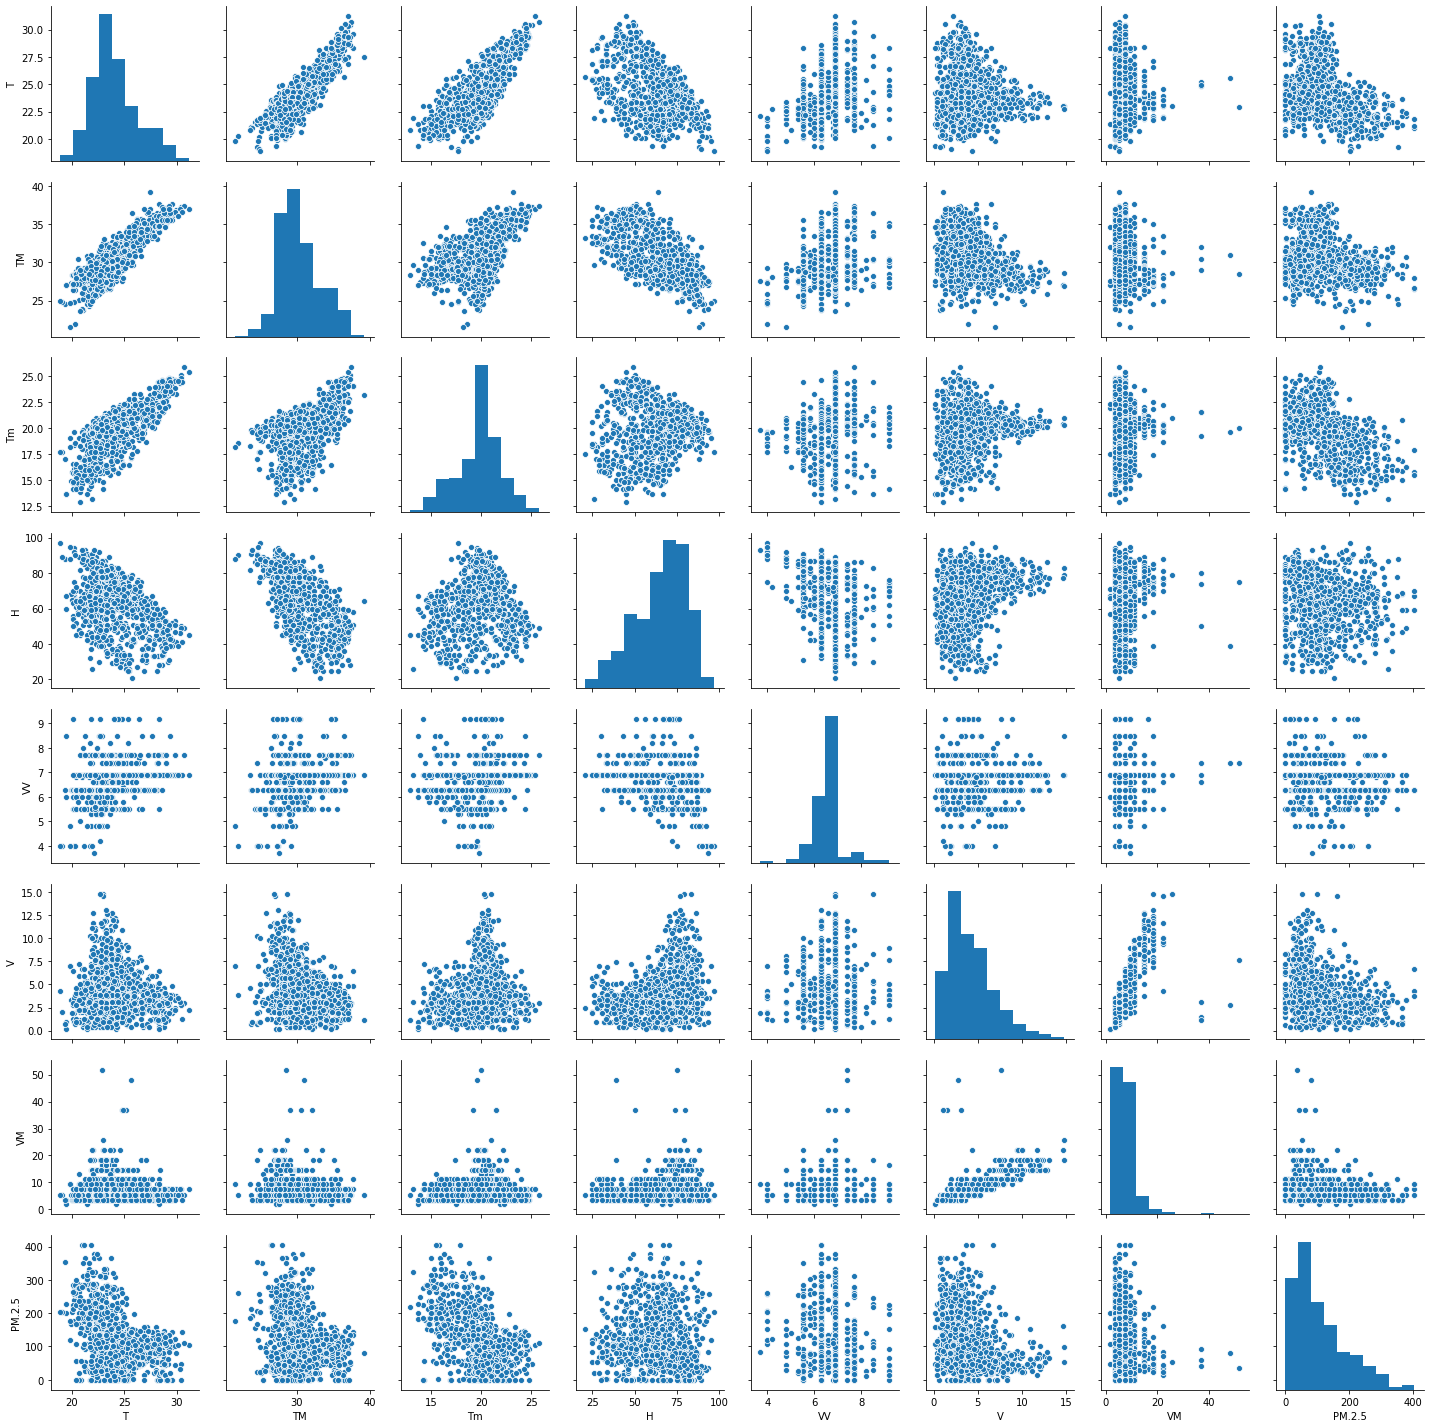

In [13]:
## Pairplot  - Multivariat analysis
sns.pairplot(df)

In [14]:
## Pearson correlation
df.corr()

,T,TM,Tm,H,VV,V,VM,PM.2.5
T,1.000000,0.869258,0.753944,-0.455387,0.325016,-0.112894,-0.066897,-0.347038
TM,0.869258,1.000000,0.478298,-0.636506,0.287989,-0.290409,-0.201408,-0.162840
Tm,0.753944,0.478298,1.000000,0.156138,0.138933,0.163599,0.141125,-0.514716
H,-0.455387,-0.636506,0.156138,1.000000,-0.274199,0.354845,0.262063,-0.218054
VV,0.325016,0.287989,0.138933,-0.274199,1.000000,0.051324,0.042967,-0.123441
V,-0.112894,-0.290409,0.163599,0.354845,0.051324,1.000000,0.710970,-0.333317
VM,-0.066897,-0.201408,0.141125,0.262063,0.042967,0.710970,1.000000,-0.268927
PM.2.5,-0.347038,-0.162840,-0.514716,-0.218054,-0.123441,-0.333317,-0.268927,1.000000


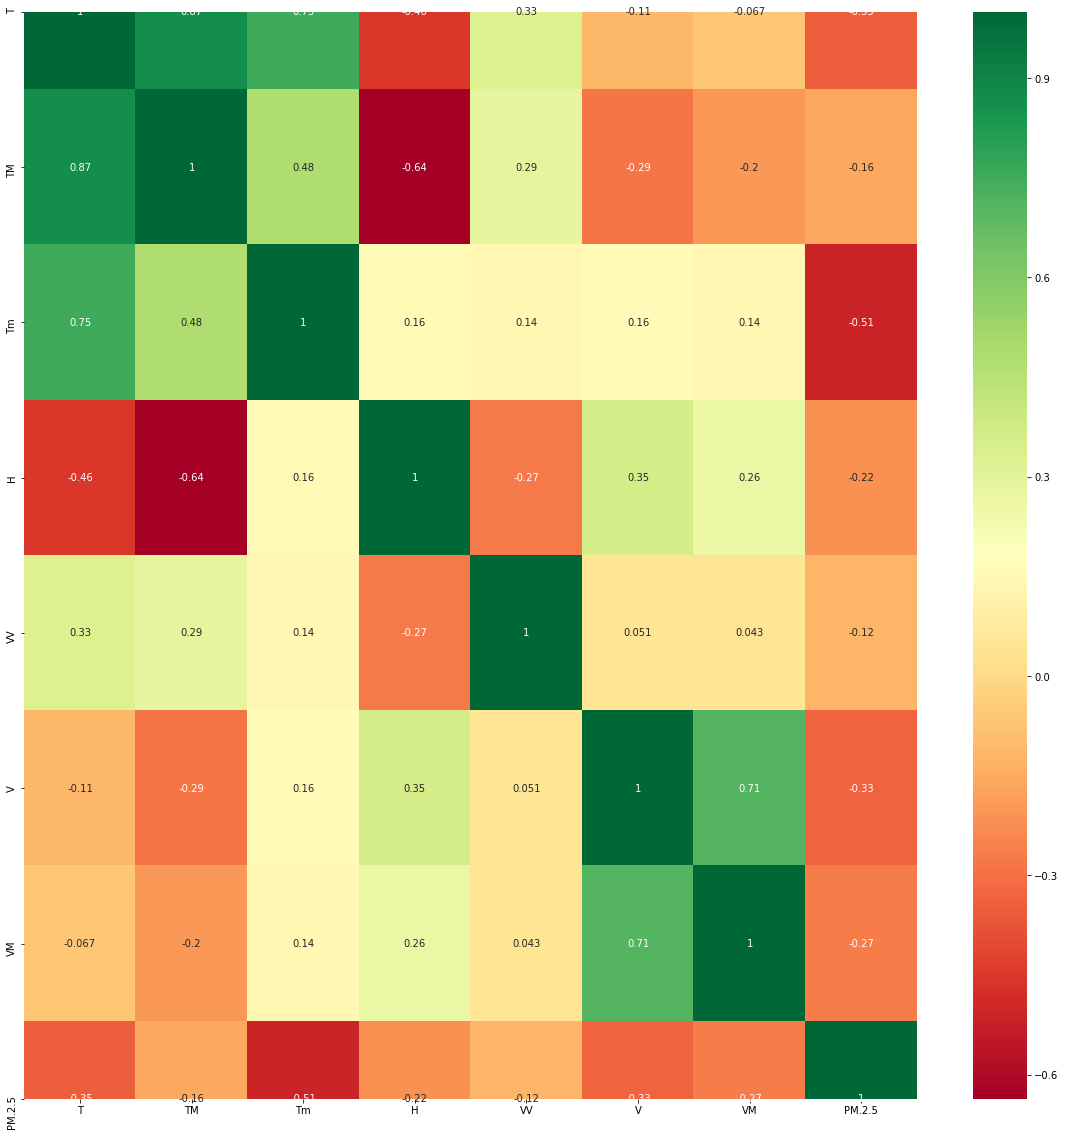

In [15]:
## Correlation with Heatmap
# get corellations of each feature in the dataset

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [16]:
# Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

D:\Programs\Anaconda2\envs\py36\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [17]:
print(model.feature_importances_)

[0.18892165 0.12138546 0.28389836 0.13466161 0.0656914  0.13384133
 0.07160019]


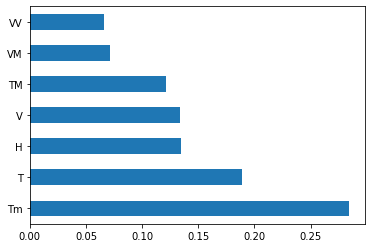

In [18]:
# Plot graph of feature importance
feat_importance = pd.Series(model.feature_importances_,index=X.columns) 
feat_importance.nlargest(10).plot(kind='barh')
plt.show()

## Linear Regression

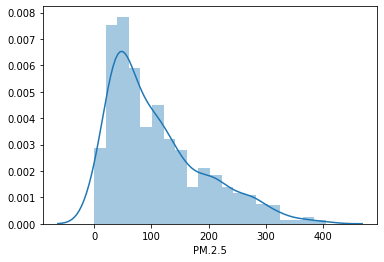

In [19]:
sns.distplot(y)

In [20]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# R square tells about the error rate with respect to the best fit line eg.R sqare of 1 means that line passes through all points
print("Coefficient of determination R^2 on train set : {}".format(regressor.score(X_train,y_train)))

Coefficient of determination R^2 on train set : 0.37658608368171353


In [23]:
print("Coefficient of determination R^2 on test set : {}".format(regressor.score(X_test,y_test)))

Coefficient of determination R^2 on test set : 0.3203644983819265


In [24]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv=5)

In [25]:
score.mean() # kind of R^2

0.3077986641408173

In [26]:
regressor.coef_

array([-22.60425621,  -0.66044288,   2.42733022,  -2.2941454 ,
        -3.9075725 ,  -7.68163577,  -1.12525806])

In [27]:
regressor.intercept_

842.8892528727158

In [28]:
# Model Evaluation
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
T,-22.604256
TM,-0.660443
Tm,2.427330
H,-2.294145
VV,-3.907573
V,-7.681636
VM,-1.125258


In [29]:
prediction = regressor.predict(X_test)

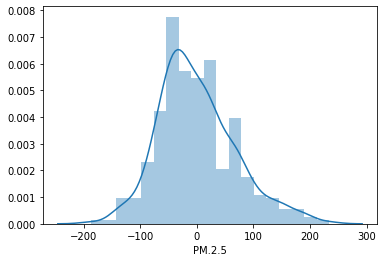

In [30]:
sns.distplot(y_test-prediction)

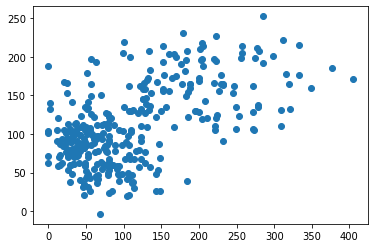

In [31]:
plt.scatter(y_test,prediction)

In [32]:
# Regression Evaluation metrics
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,prediction))
print("MSE: ",metrics.mean_squared_error(y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  53.50835013939557
MSE:  4636.584279901315
RMSE:  68.09246859896706


## Exporting to pickle file

In [33]:
import pickle
file = open("linear_regressor.pkl",'wb')

# dump information to the file
pickle.dump(regressor,file)

## Comparision Linear,Ridge and Lasso Regression

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [43]:
lin_regressor = LinearRegression()
mse = cross_val_score(lin_regressor,X,y,scoring="neg_mean_squared_error",cv=5)
mean_mse =np.mean(mse)
print(mean_mse)

-4580.104683245906


## Ridge Regression

In [34]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge = Ridge()

In [44]:
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

D:\Programs\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 40]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [45]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-4576.786827652447


## Lasso Regression

In [46]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [48]:
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,40]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring="neg_mean_squared_error",cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

D:\Programs\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1743699.994509155, tolerance: 574.550106971931
  positive)
D:\Programs\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1720614.8631755179, tolerance: 650.0089259494933
  positive)
D:\Programs\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1647523.2960154475, tolerance: 598.893434768487
  positive)
D:\Programs\Anaconda2\envs\py36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number 

{'alpha': 1}
-4562.612900052984


D:\Programs\Anaconda2\envs\py36\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## Model Evaluation

In [51]:
prediction = lasso_regressor.predict(X_test)

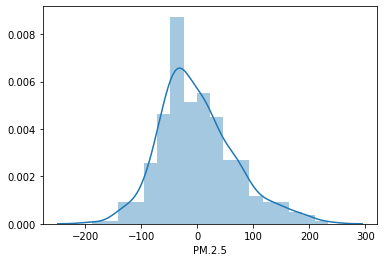

In [53]:
sns.distplot(y_test-prediction)

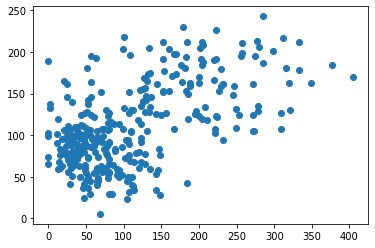

In [54]:
plt.scatter(y_test,prediction)

In [55]:
from sklearn import metrics
print("MAE: ",metrics.mean_absolute_error(y_test,prediction))
print("MSE: ",metrics.mean_squared_error(y_test,prediction))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE:  52.8933272883812
MSE:  4580.876626834517
RMSE:  67.68217362669817


In [58]:
import pickle
file = open("lasso_regressor.pkl",'wb')

# dump information to the file
pickle.dump(lasso_regressor,file)